In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler
import folium 

# Analysis of SARMIA models for PM10 concentration level

The results of analysis of SARMIA models for PM10 pollution are presented. 
First, the available data where aggregated accross all recording stations (using average) to obtain 1 time series describing an average level of pollution. Then a grid search was performed to find the best possible set of hyperparameters for the SARIMA model. Using the hyperparamters obtained for an aggregated model, the same models were fitted to data for every recording station. The obtained models consist from autoregressive part with 3 lags, moving average part with 1 lag and seasonal moving average part with 1 lag. 

In [3]:
data = pd.read_csv('models_PM10.csv').drop(['Unnamed: 0'], 1)

In [4]:
data

,installation,arparams_0,arparams_1,arparams_2,maparams_0,seasonalmaparams_0
0,6147,1.443065,-0.588068,0.097338,-0.360950,-0.989190
1,6149,0.648340,0.205961,-0.041008,0.194476,-0.997324
2,6150,1.537117,-0.735727,0.153060,-0.589202,-0.997083
3,6151,0.426180,0.345788,0.040484,0.495050,-0.999793
4,6152,0.529541,0.376505,-0.063075,0.458252,-0.977355
...,...,...,...,...,...,...
753,6116,0.495320,0.429677,-0.029925,0.553285,-0.996605
754,8165,0.623914,0.577574,-0.266035,0.697650,-0.999714
755,10213,0.090128,0.917463,-0.109479,0.987320,-0.996267
756,10216,0.226372,0.798127,-0.111779,0.889810,-0.999422


In [5]:
data.describe()

,installation,arparams_0,arparams_1,arparams_2,maparams_0,seasonalmaparams_0
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,4961.069921,0.753999,0.130430,-0.000766,0.209476,-0.988148
std,3361.317840,0.501279,0.488008,0.098936,0.515861,0.021419
min,233.000000,-0.345501,-1.314225,-0.353108,-0.976113,-0.999999
25%,2264.250000,0.363851,-0.221630,-0.059810,-0.186965,-0.997906
50%,5650.000000,0.667317,0.200260,0.001447,0.304899,-0.996027
75%,7861.250000,1.128570,0.531046,0.063898,0.640594,-0.992528
max,10582.000000,2.039086,0.949439,0.293826,0.998415,-0.856710


The next plots shows the one-dimensional projections of obtained paramter space. The y -axis represent the values of a given paramters, wheres the x-axis represents the recording stations. It can be seen, that for every paramter, the coefficnets form 1 cluster, however for all parts except the seasonal, the coefficents for a part of stations are negetive, wheres for other are positve indicating a dfferent potential behaviours of pollution in time. 

Text(0.5, 1.0, 'arparams_0')

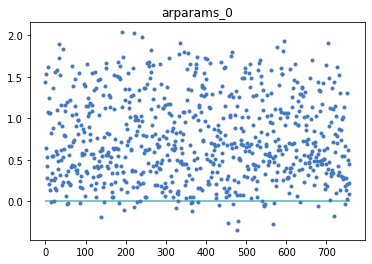

In [6]:
plt.plot(data.arparams_0, '.', c="#4378BF")
plt.hlines(y=0, xmin=0, xmax=len(data.arparams_0), colors="#46BAC2")
plt.title('arparams_0')

Text(0.5, 1.0, 'arparams_1')

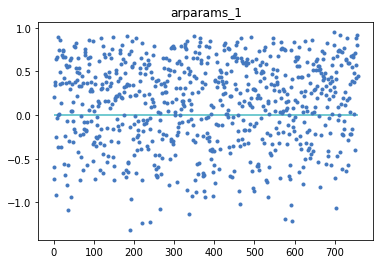

In [7]:
plt.plot(data.arparams_1, '.', c="#4378BF")
plt.hlines(y=0, xmin=0, xmax=len(data.arparams_0), colors="#46BAC2")
plt.title('arparams_1')

Text(0.5, 1.0, 'arparams_2')

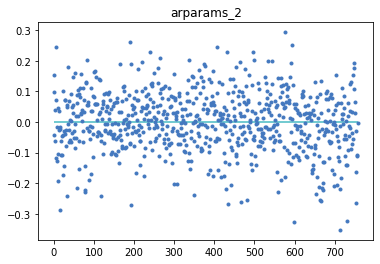

In [8]:
plt.plot(data.arparams_2, '.', c="#4378BF")
plt.hlines(y=0, xmin=0, xmax=len(data.arparams_0), colors="#46BAC2")
plt.title('arparams_2')

Text(0.5, 1.0, 'maparams_0')

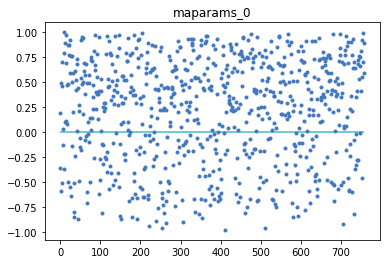

In [9]:
plt.plot(data.maparams_0, '.', c="#4378BF")
plt.hlines(y=0, xmin=0, xmax=len(data.arparams_0), colors="#46BAC2")
plt.title('maparams_0')

Text(0.5, 1.0, 'seasonalmaparams_0')

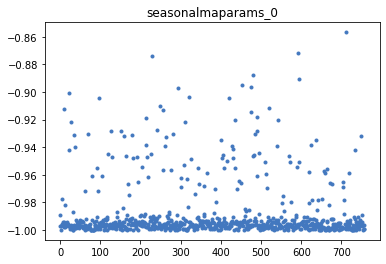

In [11]:
plt.plot(data.seasonalmaparams_0, '.', c="#4378BF")
#plt.hlines(y=0, xmin=0, xmax=len(data.arparams_0), colors="#46BAC2")
plt.title('seasonalmaparams_0')

In [15]:
installations_list = pd.read_csv('installations.csv')

In [16]:
installations = set(data.installation.tolist()).intersection(installations_list.installation_id)
installations_list = installations_list[['installation_id', 'elevation', 'geolocation_latitude', 'geolocation_longitude']]
installations_list = installations_list.set_index('installation_id')
installations_list = installations_list[installations_list.index.isin(installations)]

In [22]:
data['installation_id'] = data.installation
installations_list = data.join(installations_list, on = 'installation_id', how='right')

In [40]:
installations_list['color_ar0'] = np.where(installations_list.arparams_0 >= 0, "#F05A71", "#4378BF")
installations_list['color_ar1'] = np.where(installations_list.arparams_1 >= 0, "#F05A71", "#4378BF")
installations_list['color_ar2'] = np.where(installations_list.arparams_2 >= 0, "#F05A71", "#4378BF")
installations_list['color_ar'] = np.where((installations_list.arparams_0 >= 0) & (installations_list.arparams_1 >= 0) & (installations_list.arparams_2 >= 0), "#F05A71", "#4378BF")
installations_list['color_ma0'] = np.where(installations_list.maparams_0 >= 0, "#F05A71", "#4378BF")

In [41]:
geolocation_latitude_center = installations_list.geolocation_latitude.mean()
geolocation_longitude_center = installations_list.geolocation_longitude.mean()

To present the obtained results, a split of location into two categories has been used. The red points indicates the location of recording stations, where all the coefficients in a autoregressive part are positive, blue points are the locations, where at least one coefficient in autoregressive part is non-positive. The red points are teh locations with a very strong feedback in terms of the pollution level. They tends to concentrate outside big cities, but to fully understand the obtained results, an expert knowledge would be required.

In [42]:
map_PM10 = folium.Map(location=[geolocation_latitude_center, geolocation_longitude_center], zoom_start=10) 
componenet = 'ar'
for lat,lan, i in zip(installations_list.geolocation_latitude.tolist(), installations_list.geolocation_longitude.tolist(), installations_list['color_' + componenet]):  
    folium.CircleMarker(location=[lat,lan],
                        radius=5,
                        weight=2,
                        color=i,
                        fill_color=i,
                        fill_opacity=0.7).add_to(map_PM10)
map_PM10